# Sparse Hebbian Learning: toward a quantitative measure of the quality of filters

We are interested here in learning the "optimal" components of a set of images (let's say some "natural", usual images). As there is no supervisor to guide the learning, this is called unsupervised learning. Our basic hypothesis to find the best ("optimal") components will be to assume that *a priori* the most sparse is more plausible. We will implement the derived algorithm in this set of scripts.



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

## experiments

To test and control for the role of different parameters, we will have a first object (in the [shl_experiments.py](https://github.com/bicv/SparseHebbianLearning/blob/master/shl_scripts/shl_experiments.py) script) that controls a learning experiment. It contains all relevant parameters, but can also keep a trace of the history of some statistics. This is useful to compare the relative efficiency of the different solutions.


In [3]:
tag = 'coding'
homeo_methods = ['None', 'HAP', 'HEH']


record_num_batches = 2**12

seed = 42
np.random.seed(seed)

from shl_scripts.shl_experiments import SHL
shl = SHL()
data = shl.get_data(matname=tag + '_test')
indx = np.random.permutation(data.shape[0])[:record_num_batches]

list_figures = []

dico = {}
for homeo_method in homeo_methods:
    print(19*'🐶' + homeo_method + 10*'🐶')
    shl = SHL(homeo_method=homeo_method)
    dico[homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method)


🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶None🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶


## theory



In [4]:
from scipy.stats import binom
# define the mean
rho = shl.l0_sparseness / shl.n_dictionary

# draw binomial samples
sparse_code_binary = np.random.rand(record_num_batches, shl.n_dictionary) > 1 - rho

In [5]:
print('Sum of non-zero coefficients', sparse_code_binary.sum(), '~=', shl.l0_sparseness*record_num_batches)
print('average non-zeros', np.count_nonzero(sparse_code_binary, axis=0).mean(), '~=', rho*record_num_batches)
print('activation vector', np.count_nonzero(sparse_code_binary, axis=0))

Sum of non-zero coefficients 53318 ~= 53248
average non-zeros 120.90249433106575 ~= 120.7437641723356
activation vector [120 108 123 108 126 101 131 106 116 136 129 117 112 114 148 128 127 135
 124 125 106 123 111 117 128 105 130 111 115 118 136 105 107 111 110 137
 133 122 118 118 121 119 100 125 131 106 115 142 103 122 129 119 119 115
 133 110 120 101 115 121 113 133 128 116 122 110 108 123 115 119 126 123
 129 131 124 101 124 135 127 127 132 110 107 124 115 105 113 133 130 140
 119 128 119 113 113 138 131 112 123 122 118 122 117 108 129 118 123 116
 118 123 119 117 125 116 122 115 131 117 121 110 140 118 122 113 119 118
 112 114 131 105 112 128 123 116 132 124 116 116 114 106 128 134 106 128
 106 119 114 115 130 129 106 124 126 135 115 146 126 122 110 129 136 131
 129 127 116 128 118 123 126 137 113 113 107 132 124 107 112 119 116 111
 113 138 123 110 126 101 106 113 122 109 115 117 131 135 136 124 134 123
 121 103 143 129 130 122 127 111 120 123 137 119 127 112 112 115 133 128
 110

Shape of co-occurrences (4096, 441, 441)
activation vector [[120   7   7 ...   5   2   0]
 [  7 108   3 ...   3   4   4]
 [  7   3 123 ...   6   2   6]
 ...
 [  5   3   6 ... 130   5   5]
 [  2   4   2 ...   5 106   4]
 [  0   4   6 ...   5   4 120]]
marginal activation vector [3.9138 3.5102 3.9864 3.3968 3.9252 3.2132 4.1429 3.2177 3.7415 4.1701
 4.0748 3.644  3.5261 3.542  4.6644 4.229  3.9456 4.4444 3.7937 3.9705
 3.415  3.7755 3.458  3.7823 4.0204 3.2721 3.9796 3.4875 3.6213 3.7778
 4.381  3.2404 3.3288 3.5805 3.542  4.2018 4.288  3.7982 3.7778 3.7687
 3.9433 3.712  3.2812 4.0113 4.0862 3.2971 3.6848 4.5896 3.2562 3.9002
 4.0794 3.9206 3.6168 3.6395 4.2653 3.5057 3.941  3.1474 3.5533 3.7551
 3.4807 4.1723 4.0635 3.678  3.8186 3.4807 3.3605 3.8231 3.5533 3.7619
 4.0385 3.7891 3.9819 4.3175 4.0884 3.3265 3.9864 4.1497 3.9456 4.0227
 4.1973 3.3424 3.3401 3.8821 3.7438 3.4263 3.458  4.1361 4.0023 4.4626
 3.7574 4.1791 3.7574 3.5782 3.5261 4.3469 4.2313 3.5896 3.7256 3.9342
 3.712  3.92

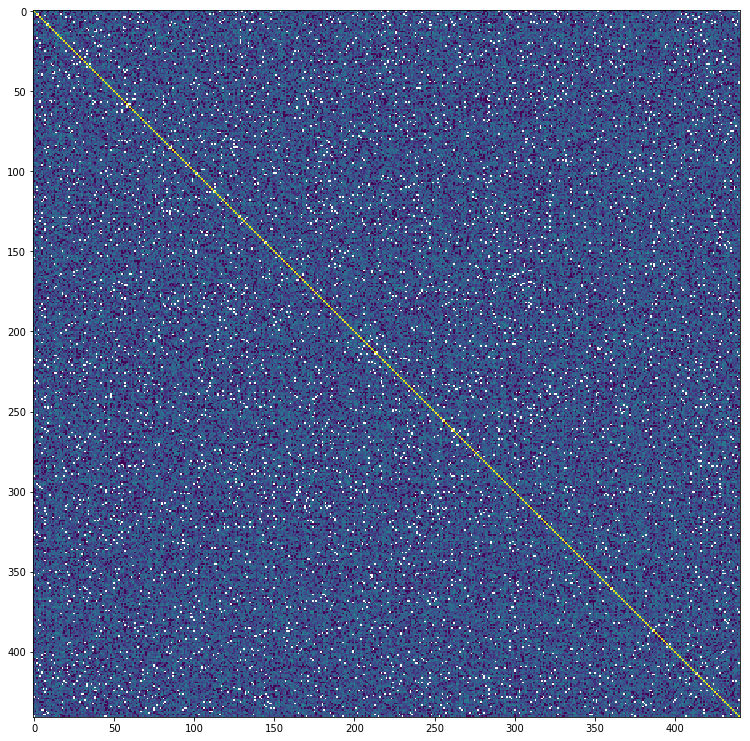

In [6]:
b_ij = (sparse_code_binary[:, np.newaxis, :]>0) * (sparse_code_binary[:, :, np.newaxis]>0)
print('Shape of co-occurrences', b_ij.shape)
print('activation vector', np.count_nonzero(b_ij, axis=0))
fig, ax= plt.subplots(figsize=(13, 13))
ax.imshow(np.log(np.count_nonzero(b_ij, axis=0)));
print('marginal activation vector', np.count_nonzero(b_ij, axis=0).mean(axis=-1))

Min-Max -2.7193978846467254e-06 0.0006457493478392432


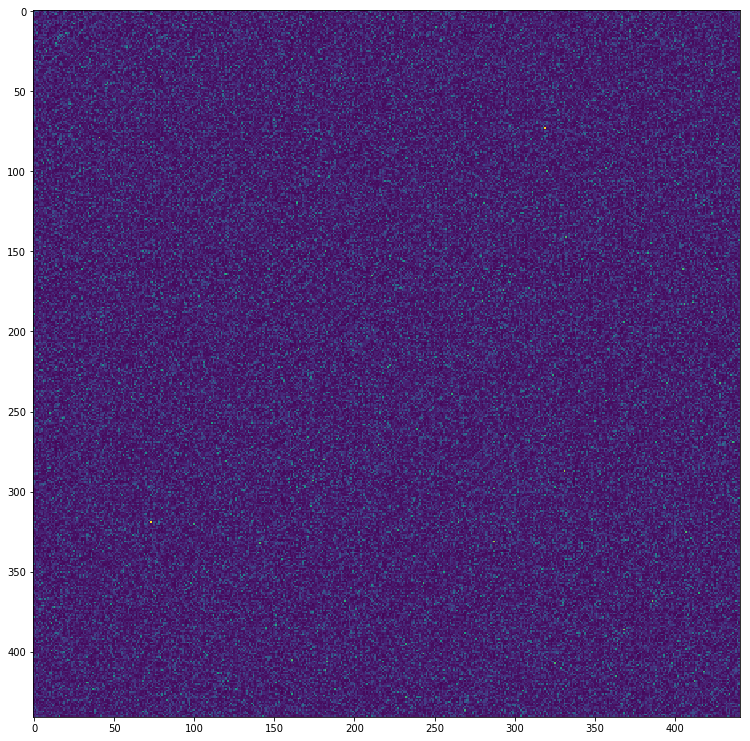

In [7]:
b_ij = (sparse_code_binary[:, np.newaxis, :]>0) * (sparse_code_binary[:, :, np.newaxis]>0)
P_ij = 1.*np.count_nonzero(b_ij, axis=0)
P_ij /= P_ij.sum()
P_i = 1.*np.count_nonzero(sparse_code_binary, axis=0)
P_i /= P_i.sum()
fig, ax= plt.subplots(figsize=(13, 13))
MI_ = - (P_ij * np.log( P_i[:, np.newaxis]*P_i[np.newaxis, :] / P_ij  ))
MI_[P_ij==0] = 0
MI_[(P_i[:, np.newaxis]*P_i[np.newaxis, :])==0] = 0
print('Min-Max', MI_.min(), MI_.max())
np.fill_diagonal(MI_, 0)
ax.imshow(MI_);

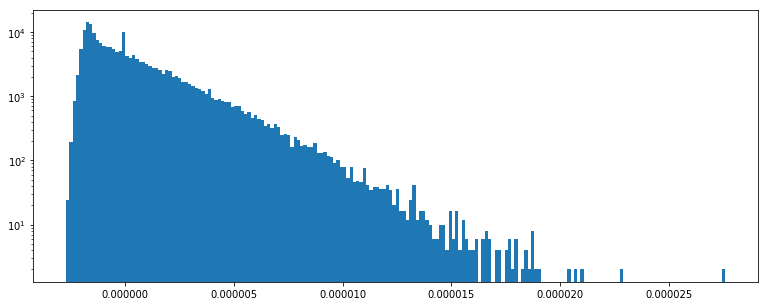

In [8]:
fig, ax= plt.subplots(figsize=(13, 5))
ax.hist(MI_.ravel(), bins=200)
ax.set_yscale('log');

In [9]:
from shl_scripts.shl_tools import get_MI
MI_theory = []
for _ in range(10):
    sparse_code_binary = np.random.rand(record_num_batches, shl.n_dictionary) > 1 - rho
    MI = get_MI(sparse_code_binary)
    print ('Mutual information for random sample=', MI)
    MI_theory.append(MI)
MI_theory = np.array(MI_theory)

Mutual information for random sample= 0.31827948868055905
Mutual information for random sample= 0.3130113632146848
Mutual information for random sample= 0.31258680166377517
Mutual information for random sample= 0.3095515941267165
Mutual information for random sample= 0.3151091483942618
Mutual information for random sample= 0.31632241778630205
Mutual information for random sample= 0.3136034219579275
Mutual information for random sample= 0.30695807966205535
Mutual information for random sample= 0.3115943209324643
Mutual information for random sample= 0.3139577206741111


## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SparseHebbianLearning/blob/master/shl_scripts/shl_encode.py) script)

In [10]:
from shl_scripts.shl_encode import sparse_encode
sparse_code = {}
for homeo_method in homeo_methods:
    print(15*'🐶' + homeo_method[:3] + 15*'🐶')
    if dico[homeo_method].P_cum is None: 
        gain = np.ones(shl.n_dictionary)
    else:
        gain = None
    sparse_code[homeo_method] = sparse_encode(data[indx, :], dico[homeo_method].dictionary, precision=dico[homeo_method].precision, 
#                                              P_cum=dico[homeo_method].P_cum, gain=None, 
                                              P_cum=None, gain=np.ones(shl.n_dictionary),

                                              l0_sparseness = shl.l0_sparseness, C=shl.C)
    # from shl_scripts.shl_tools import print_stats
    # SD, SE = print_stats(data[indx, :], dico[homeo_method].dictionary, sparse_code[homeo_method])

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶Non🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶


## measuring the distance to independance 

In [11]:
print ('Mutual information for theory=', MI_theory.mean(), '+/-', MI_theory.std())
#fig, ax= plt.subplots(figsize=(13, 5))
for homeo_method in homeo_methods:
    print(15*'🐶' + homeo_method[:3] + 15*'🐶')
    MI = get_MI(sparse_code[homeo_method])
    print ('Mutual information for homeo_method=', homeo_method, 'is', MI)

Mutual information for theory= 0.3130974357092858 +/- 0.0030836581759976795
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶Non🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
Mutual information for homeo_method= None is 0.434755655521802
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
Mutual information for homeo_method= HAP is 0.4334026882144786
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
Mutual information for homeo_method= HEH is 0.42945591207689293


## Version used

In [12]:
%load_ext watermark
%watermark -i -h -m -v -p numpy,matplotlib,shl_scripts

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython 6.5.0
OS Darwin 17.7.0 x86_64 i386 64bit
shl_scripts 20171221
numpy 1.15.1
shl_scripts 20171221
pandas 0.23.4
matplotlib 3.0.0
Wed Sep 26 16:36:13 2018 CEST